Cybersecurity Threats (2015–2024) Analysis Report

1. Introduction
This report explores global cybersecurity threats between 2015 and 2024 using a dataset of 3,000 incidents. We aim to identify key trends, top affected countries, the most damaging attack types, and patterns in resolution time and vulnerabilities.

2. Data Loading & Inspection

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "https://raw.githubusercontent.com/swetakoski/cyber_threats_data/refs/heads/main/Global_Cybersecurity_Threats_2015-2024.csv"
df = pd.read_csv(file_path)

df.head()


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


3. Descriptive Statistics & Outlier Detection

In [3]:
mean_time = df['Incident Resolution Time (in Hours)'].mean()
median_time = df['Incident Resolution Time (in Hours)'].median()
std_time = df['Incident Resolution Time (in Hours)'].std()

print(f"Mean: {mean_time:.2f}h, Median: {median_time:.2f}h, Std Dev: {std_time:.2f}h")
q1 = df['Incident Resolution Time (in Hours)'].quantile(0.25)
q3 = df['Incident Resolution Time (in Hours)'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df['Incident Resolution Time (in Hours)'] < lower) | 
              (df['Incident Resolution Time (in Hours)'] > upper)]

outliers if not outliers.empty else print("No outliers detected.")

Mean: 36.48h, Median: 37.00h, Std Dev: 20.57h
No outliers detected.


4. Country-Level Analysis

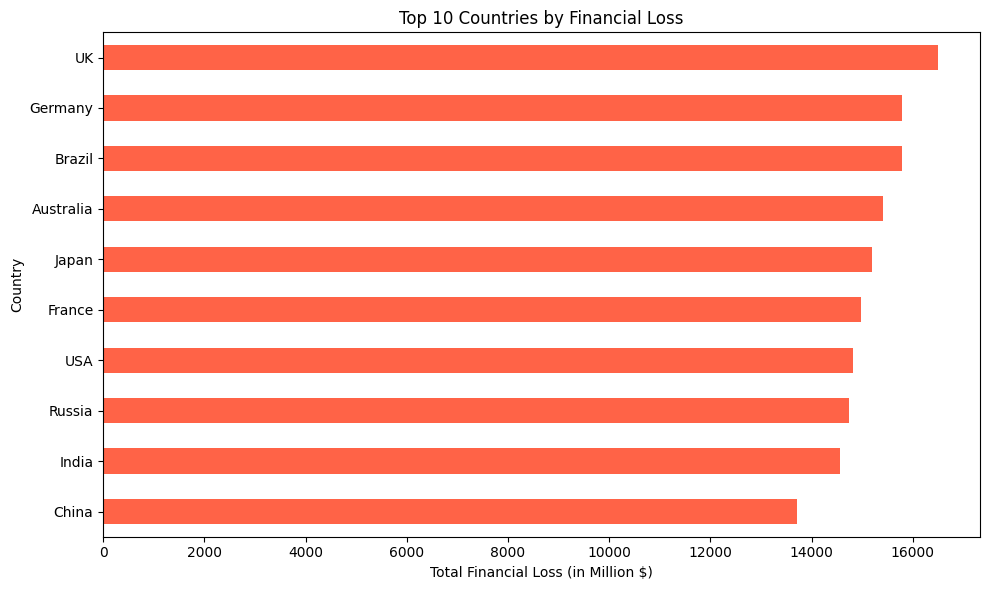

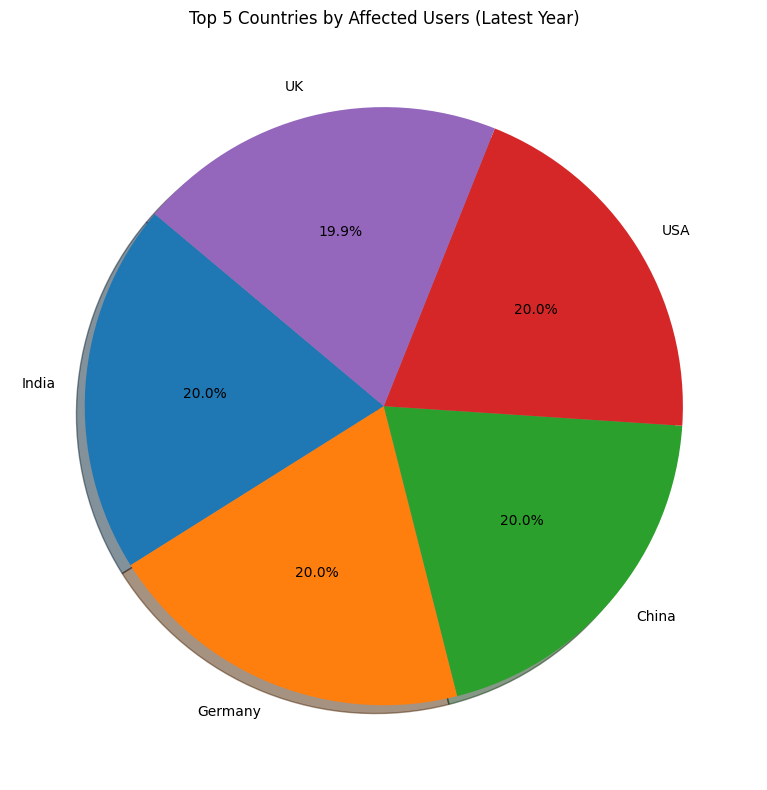

In [4]:
top_countries = df.groupby('Country')['Financial Loss (in Million $)'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='barh', color='tomato', figsize=(10,6))
plt.xlabel('Total Financial Loss (in Million $)')
plt.title('Top 10 Countries by Financial Loss')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

df_latest = df[df['Year'] == df['Year'].max()]
top_affected = df_latest.nlargest(5, 'Number of Affected Users')

plt.figure(figsize=(8, 8))
plt.pie(top_affected['Number of Affected Users'], labels=top_affected['Country'],
        autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Top 5 Countries by Affected Users (Latest Year)')
plt.tight_layout()
plt.show()

5. Time-Series Trends

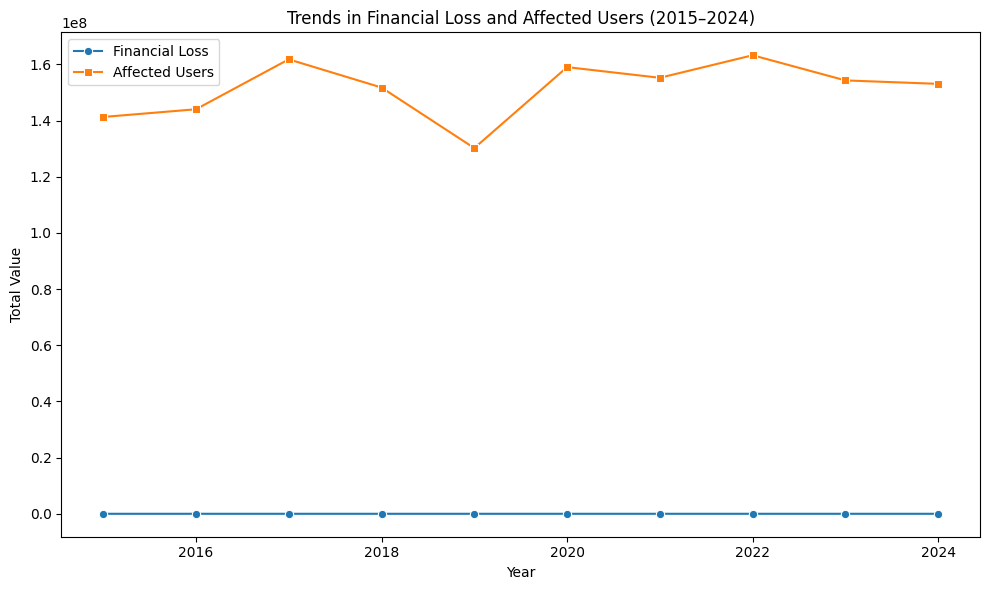

In [5]:
df_cleaned = df.dropna()
yearly_stats = df_cleaned.groupby('Year').agg({
    'Financial Loss (in Million $)': 'sum',
    'Number of Affected Users': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_stats, x='Year', y='Financial Loss (in Million $)', label='Financial Loss', marker='o')
sns.lineplot(data=yearly_stats, x='Year', y='Number of Affected Users', label='Affected Users', marker='s')
plt.title('Trends in Financial Loss and Affected Users (2015–2024)')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.legend()
plt.tight_layout()
plt.show()

6. Attack-Type Insights

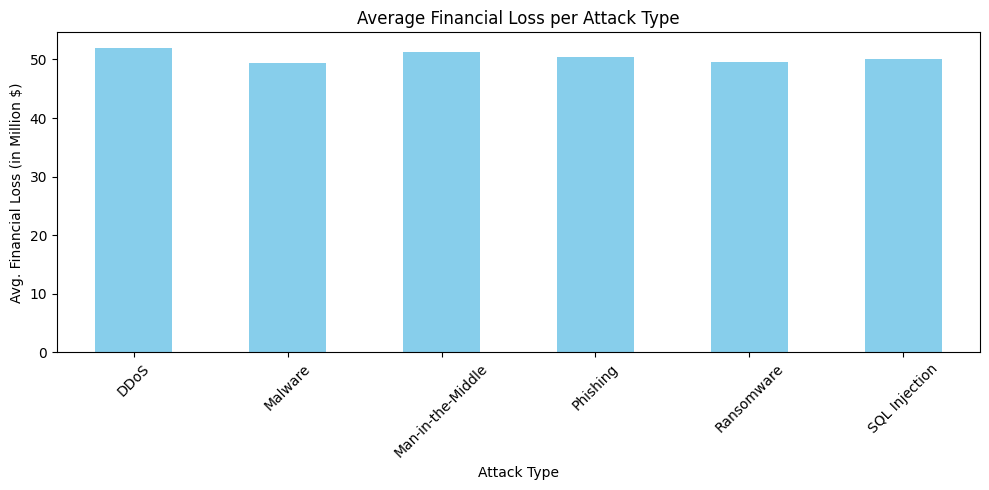

In [6]:
avg_loss_per_attack = df.groupby('Attack Type')['Financial Loss (in Million $)'].mean()
avg_loss_per_attack.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Average Financial Loss per Attack Type')
plt.ylabel('Avg. Financial Loss (in Million $)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

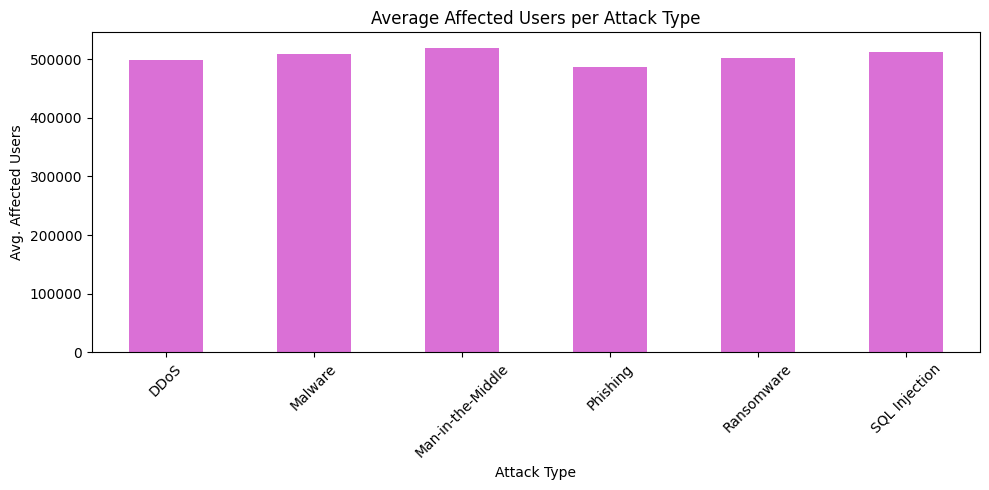

In [7]:
avg_users_per_attack = df.groupby('Attack Type')['Number of Affected Users'].mean()
avg_users_per_attack.plot(kind='bar', figsize=(10, 5), color='orchid')
plt.title('Average Affected Users per Attack Type')
plt.ylabel('Avg. Affected Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

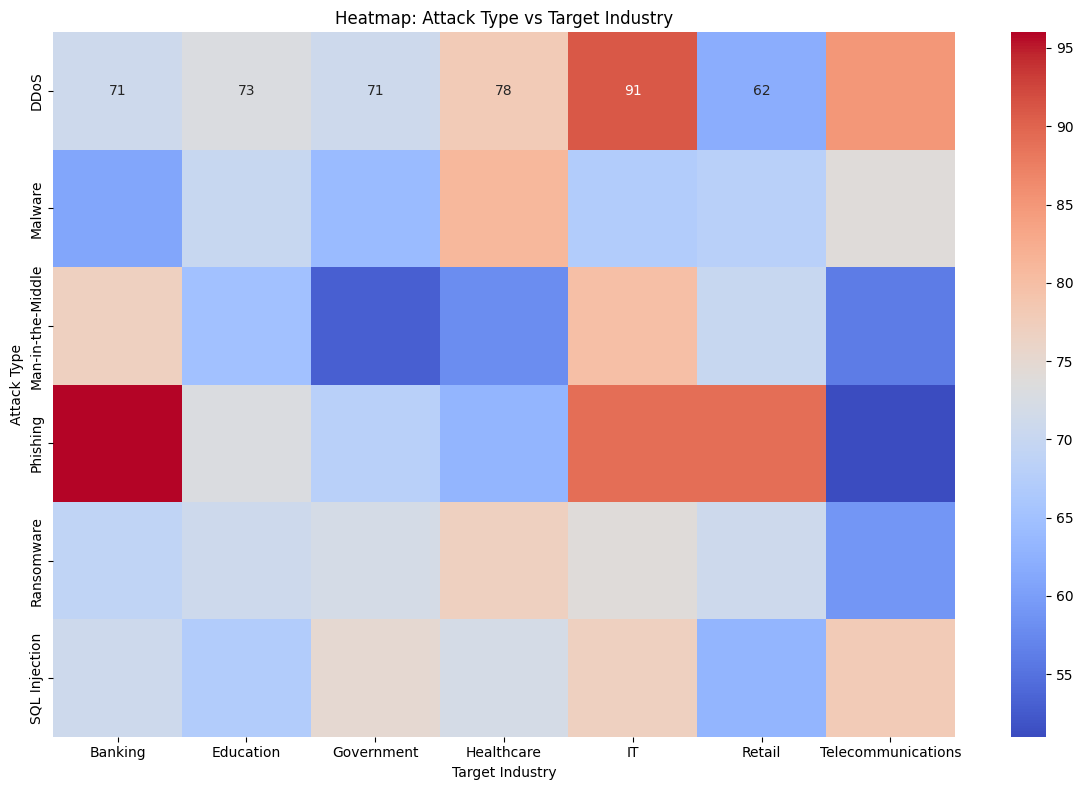

In [8]:
pivot_heatmap = df.groupby(['Attack Type', 'Target Industry']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_heatmap, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap: Attack Type vs Target Industry')
plt.xlabel('Target Industry')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

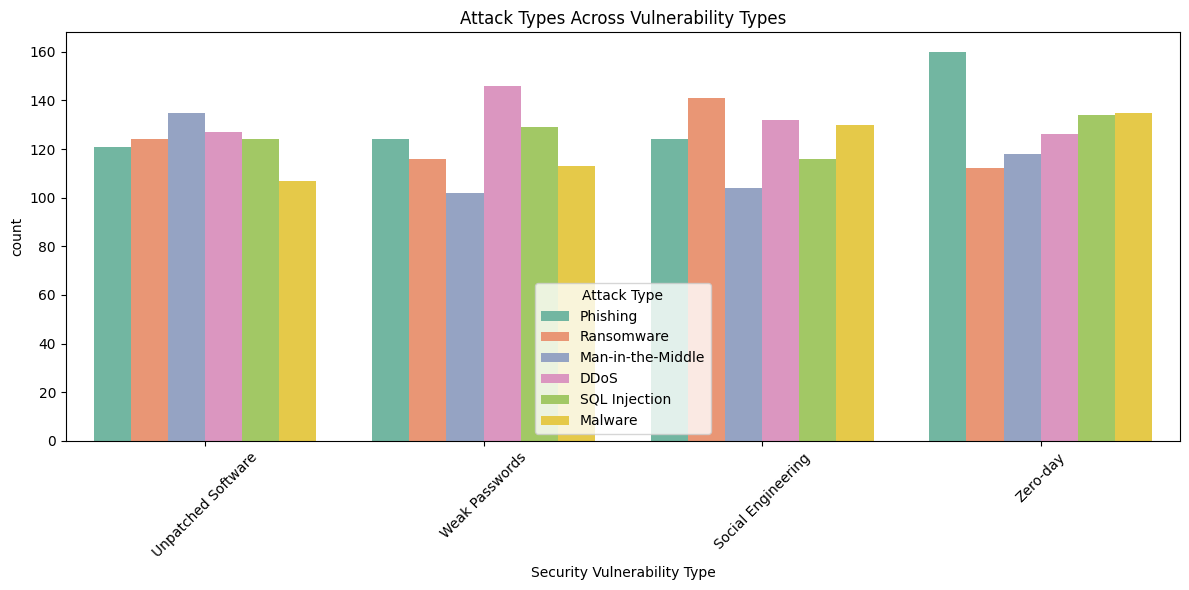

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Security Vulnerability Type', hue='Attack Type', palette='Set2')
plt.title('Attack Types Across Vulnerability Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

7. Correlation & Attack Evolution

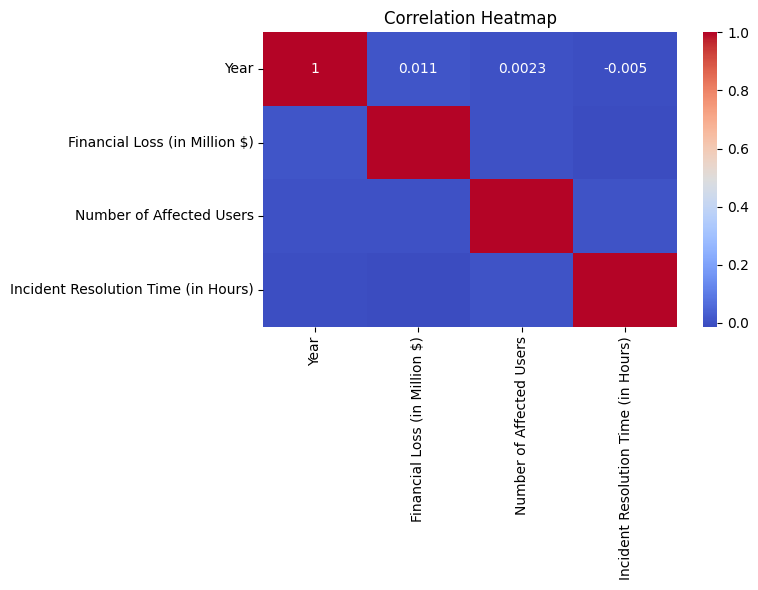

In [10]:
correlation = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

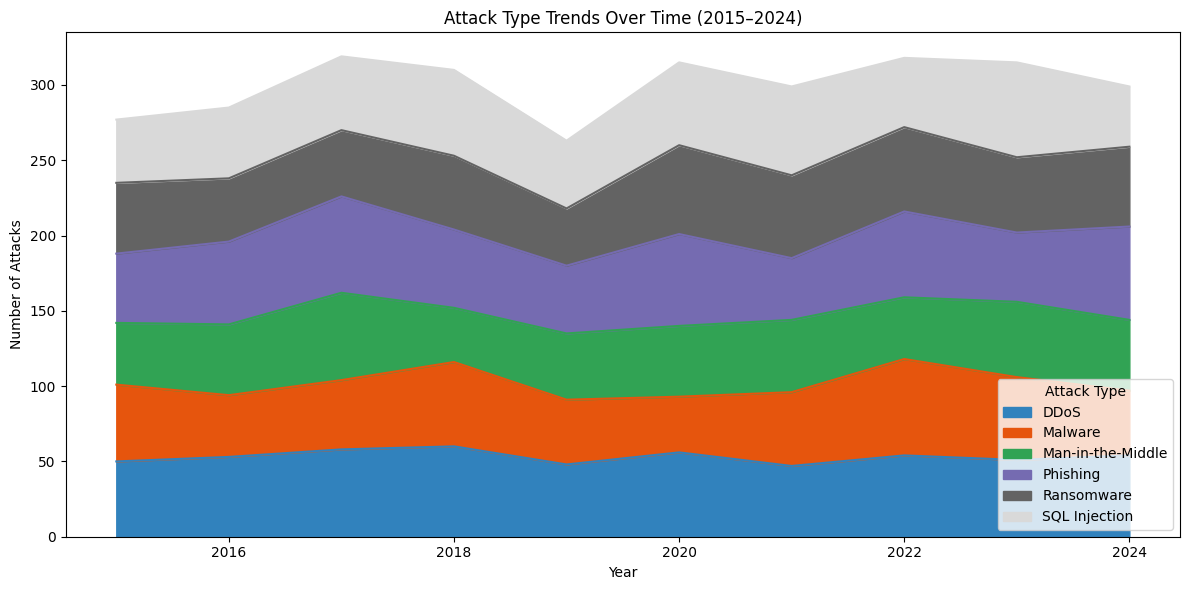

In [11]:
attack_trends = df.groupby(['Year', 'Attack Type']).size().unstack().fillna(0)

attack_trends.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title('Attack Type Trends Over Time (2015–2024)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

8. Summary & Key Insights
- 2017 had the highest financial loss overall.
- 2022 saw the greatest number of affected users.
- UK, Germany, and Brazil were hit hardest financially.
- Ransomware and Man-in-the-Middle were among the costliest and most common attacks.
- IT, Education, and Telecom were frequent industry targets.
- Incident resolution time averaged ~36 hours, with minimal outliers.
- Data insights can guide better defenses, faster response, and proactive security planning.